In [1]:
import DRMiFinesse as df

                                              ..-
    PyKat develop         _                  '(
                          \`.|\.__...-""""-_." )
       ..+-----.._        /  ' `            .-'
   . '            `:      7/* _/._\    \   (
  (        '::;;+;;:      `-"' =" /,`"" `) /
  L.        \`:::a:f            c_/     n_'
  ..`--...___`.  .    ,
   `^-....____:   +.      www.gwoptics.org/pykat



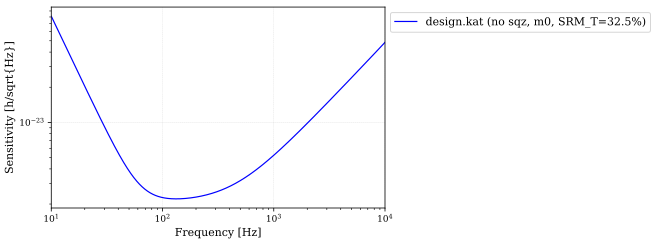

In [2]:
from pykat import finesse
from pykat.commands import *
import pykat.external.peakdetect as peak
import pykat.ifo.aligo as aligo
import pykat.ifo.aligo.plot as aligoplt
import gwinc as gwinc
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.cm as cm
%matplotlib inline
pykat.init_pykat_plotting(dpi=90)

aLIGO = aligo.make_kat()
aLIGO.maxtem = -1 #USE PLANE WAVES MODEL FIRST (speed, complexity...)
TT=0.325 #better match to sites
aLIGO.SRM.setRTL(1-TT-aLIGO.SRM.L,TT,aLIGO.SRM.L)
aLIGO=aligo.setup(aLIGO)

fig,ax=plt.subplots()
freqs=np.logspace(1,4,1000)
aligoplt.strain_sensitivity(aLIGO,ax=ax,
                            lower=freqs[0],upper=freqs[-1],steps=len(freqs),
                            plot_cmds={'label':'design.kat (no sqz, m0, SRM_T=32.5%)'})
plt.legend(loc=2,bbox_to_anchor=(1,1))

## vary the arm finesse (only)

ITMX transmission now 0.014
running setup()
ITMX transmission now 0.0123
running setup()
ITMX transmission now 0.0105
running setup()
ITMX transmission now 0.00875
running setup()
ITMX transmission now 0.007
running setup()


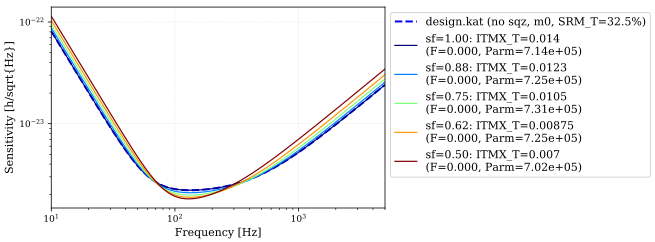

In [3]:
fig,ax=plt.subplots()

#reference line
aligoplt.strain_sensitivity(aLIGO,ax=ax,
                            plot_cmds={'label':'design.kat (no sqz, m0, SRM_T=32.5%)','ls':'--','lw':2})

#scan ITM reflectivities (logarithmically seems to give uniform spacing in QNLS)
sfs = np.linspace(1,0.5,5)
cols=cm.jet(np.linspace(0,1,len(sfs)))
for i in range(len(sfs)):
    sf=sfs[i]
    base=aLIGO.deepcopy()
    base.ITMX.setRTL(1-aLIGO.ITMX.T*sf-aLIGO.ITMX.L,aLIGO.ITMX.T*sf,aLIGO.ITMX.L)
    base.ITMY.setRTL(1-aLIGO.ITMY.T*sf-aLIGO.ITMY.L,aLIGO.ITMY.T*sf,aLIGO.ITMY.L)
    print("ITMX transmission now {:.3g}".format(float(base.ITMX.T)))
    print("running setup()")
    base = aligo.setup(base) #VERY NECESSARY TO MAINTAIN RESONANCE!
    cavvals=df.getPF(base)
    aligoplt.strain_sensitivity(base,ax=ax,
                                plot_cmds={'label':'sf={:.2f}: ITMX_T={:.3g}\n(F={:.3f}, Parm={:.3g})'.format(
                                    sf,float(base.ITMX.T),cavvals[0],cavvals[1]),
                                          'color': cols[i]})

plt.legend(loc=2,bbox_to_anchor=(1,1))


## vary the PRC finesse (only)

PRM transmission now 0.3
running setup()
PRM transmission now 0.169
running setup()
PRM transmission now 0.0949
running setup()
PRM transmission now 0.0533
running setup()
PRM transmission now 0.03
running setup()
PRM transmission now 0.0169
running setup()
PRM transmission now 0.00949
running setup()
PRM transmission now 0.00533
running setup()
PRM transmission now 0.003
running setup()


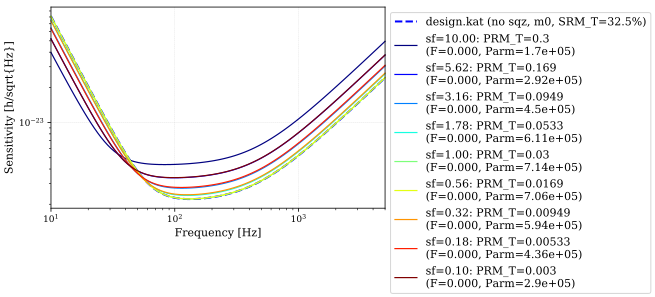

In [4]:
fig,ax=plt.subplots()

#reference line
aligoplt.strain_sensitivity(aLIGO,ax=ax,
                            plot_cmds={'label':'design.kat (no sqz, m0, SRM_T=32.5%)','ls':'--','lw':2})

#scan PRM reflectivities 
sfs = np.logspace(1,-1,9)
cols=cm.jet(np.linspace(0,1,len(sfs)))
for i in range(len(sfs)):
    sf=sfs[i]
    base=aLIGO.deepcopy()
    base.PRM.setRTL(1-aLIGO.PRM.T*sf-aLIGO.PRM.L,aLIGO.PRM.T*sf,aLIGO.PRM.L)
    print("PRM transmission now {:.3g}".format(float(base.PRM.T)))
    print("running setup()")
    base = aligo.setup(base) #VERY NECESSARY TO MAINTAIN RESONANCE!
    cavvals=df.getPF(base)
    aligoplt.strain_sensitivity(base,ax=ax,
                                plot_cmds={'label':'sf={:.2f}: PRM_T={:.3g}\n(F={:.3f}, Parm={:.3g})'.format(
                                    sf,float(base.PRM.T),cavvals[2],cavvals[1]),
                                          'color': cols[i]})

plt.legend(loc=2,bbox_to_anchor=(1,1))


tune PRM_T to meet target P_arm (could be max or a specified value)

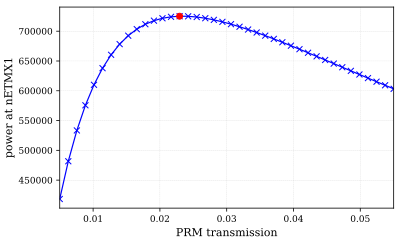

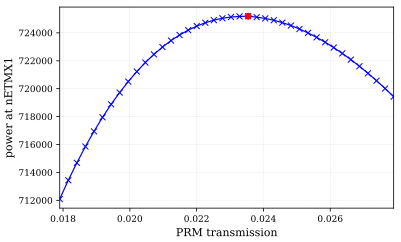

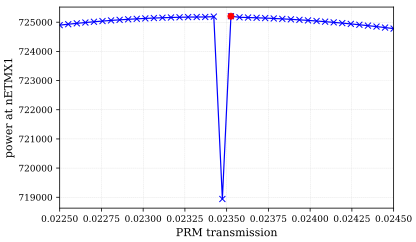

maximum power = 725205.118626481 at T=0.023525641025641024


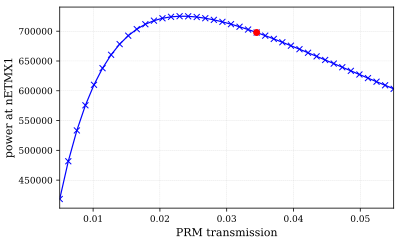

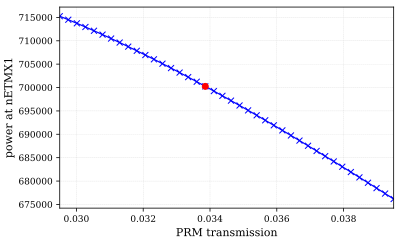

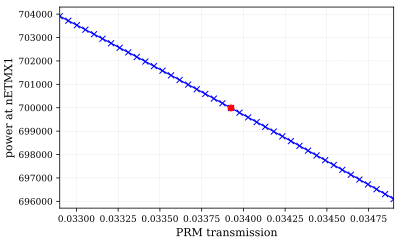

power = 699989.785417113 at T=0.03392564102564102 (target was 700000)


In [5]:
T,P = df.tuneT(aLIGO,debug=True,target_precision=1e-3) 
print("maximum power = {} at T={}".format(P,T))

TT = 700000
T,P = df.tuneT(aLIGO,debug=True,target=TT) 
print("power = {} at T={} (target was {})".format(P,T,TT))

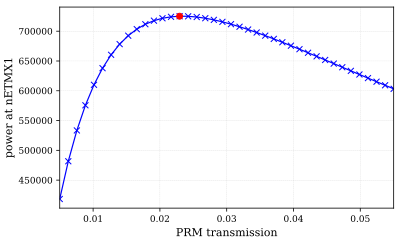

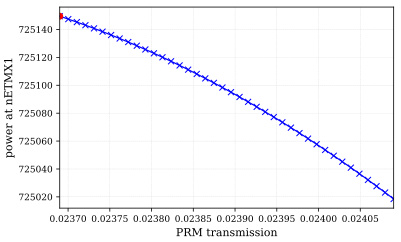

In [6]:
#manual search of that weird dip near the max...
#df.tuneT(LIGOkat,optic='PRM',node='nETMX1',val=0.03,precision=0.025,target_precision=0.001,target='max',debug=False)

T,P = df.tuneT(aLIGO,debug=True,target_precision=None) 
# T,P = df.tuneT(aLIGO,debug=True,target_precision=None,val=0.024,precision=0.005) 
T,P = df.tuneT(aLIGO,debug=True,target_precision=None,val=0.02389,precision=0.0002) 


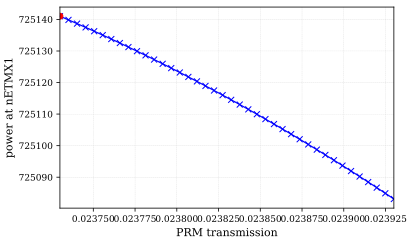

In [7]:
T,P = df.tuneT(aLIGO,debug=True,target_precision=None,val=0.02383,precision=0.0001) 

alternate faster function that skips running setup each time:

Comparing:

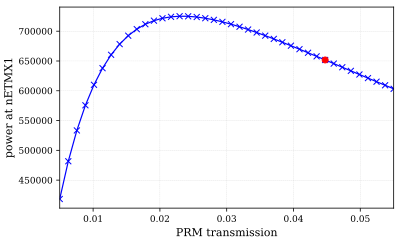

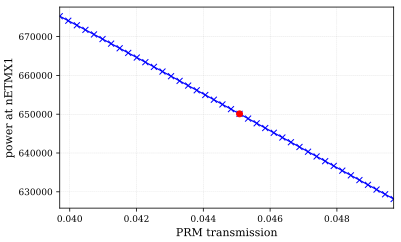

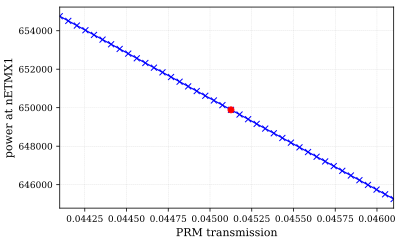

[0.0125, 0.045]


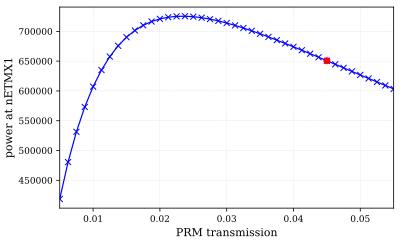

[0.04525]


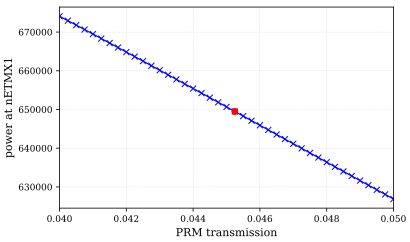

[0.04515]


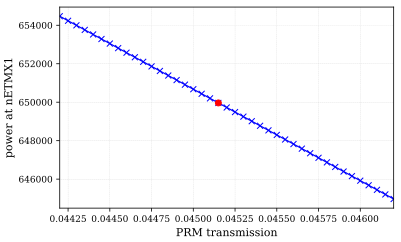

tuneT:       power = 649889.140676931 at T=0.045125641025641025 (target was 650000)
quicktuneT2: power = 649962.557237047 at T=0.0452 (target was 650000)


In [8]:
TT=650000

T,P = df.tuneT(aLIGO,debug=True,target=TT) 

T2,P2 = df.quicktuneT2(aLIGO,debug=True,target=TT) 

print("tuneT:       power = {} at T={} (target was {})".format(P,T,TT))
print("quicktuneT2: power = {} at T={} (target was {})".format(P2,T2,TT))

## vary the SRC finesse (only)

SRM transmission now 0.816
running setup()
SRM transmission now 0.546
running setup()
SRM transmission now 0.365
running setup()
SRM transmission now 0.244
running setup()
SRM transmission now 0.163
running setup()
SRM transmission now 0.109
running setup()
SRM transmission now 0.0728
running setup()
SRM transmission now 0.0486
running setup()
SRM transmission now 0.0325
running setup()


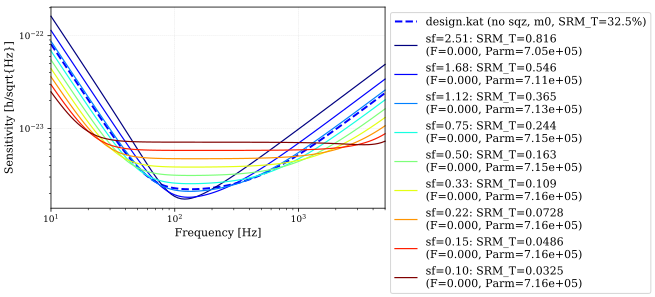

In [9]:
fig,ax=plt.subplots()

#reference line
aligoplt.strain_sensitivity(aLIGO,ax=ax,
                            plot_cmds={'label':'design.kat (no sqz, m0, SRM_T=32.5%)','ls':'--','lw':2})

#scan SRM reflectivities 
sfs = np.logspace(0.4,-1,9)
cols=cm.jet(np.linspace(0,1,len(sfs)))
for i in range(len(sfs)):
    sf=sfs[i]
    base=aLIGO.deepcopy()
    base.SRM.setRTL(1-aLIGO.SRM.T*sf-aLIGO.SRM.L,aLIGO.SRM.T*sf,aLIGO.SRM.L)
    print("SRM transmission now {:.3g}".format(float(base.SRM.T)))
    print("running setup()")
    base = aligo.setup(base) #VERY NECESSARY TO MAINTAIN RESONANCE!
    cavvals=df.getPF(base)
    aligoplt.strain_sensitivity(base,ax=ax,
                                plot_cmds={'label':'sf={:.2f}: SRM_T={:.3g}\n(F={:.3f}, Parm={:.3g})'.format(
                                    sf,float(base.SRM.T),cavvals[4],cavvals[1]),
                                          'color': cols[i]})

plt.legend(loc=2,bbox_to_anchor=(1,1))


For the SRC, the main effect is a change in the *shape* of the sensitivity curve, rather than the global sensitivity level. This can be characterised in a single value but instead looking at the DARM *transfer function* and extracting the **pole frequency** as a figure of merit.

SRM transmission now 0.816
running setup()
SRM transmission now 0.546
running setup()
SRM transmission now 0.365
running setup()
SRM transmission now 0.244
running setup()
SRM transmission now 0.163
running setup()
SRM transmission now 0.109
running setup()
SRM transmission now 0.0728
running setup()
SRM transmission now 0.0486
running setup()
SRM transmission now 0.0325
running setup()


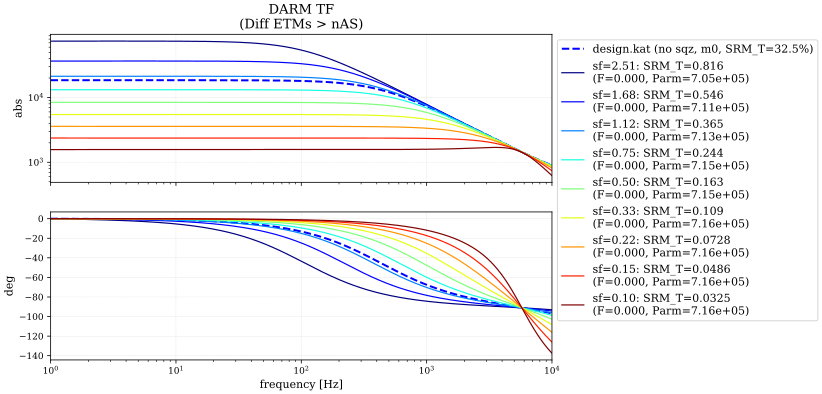

In [10]:
fig,ax=plt.subplots(2,1,figsize=(9,6),sharex=True)

#reference line
# aligoplt.strain_sensitivity(aLIGO,ax=ax,
#                             plot_cmds={'label':'design.kat (no sqz, m0, SRM_T=32.5%)','ls':'--','lw':2})
x,TF = df.DARM_TF(aLIGO)
ax[0].loglog(x,abs(TF),ls='--',lw=2,label='design.kat (no sqz, m0, SRM_T=32.5%)')
ax[1].semilogx(x,np.angle(TF,deg=True),ls='--',lw=2)

ax[0].set_title('DARM TF\n(Diff ETMs > nAS)')
ax[0].set_ylabel('abs')
ax[1].set_ylabel('deg')
ax[1].set_xlabel('frequency [Hz]')

#scan SRM reflectivities 
sfs = np.logspace(0.4,-1,9)
cols=cm.jet(np.linspace(0,1,len(sfs)))
for i in range(len(sfs)):
    sf=sfs[i]
    base=aLIGO.deepcopy()
    base.SRM.setRTL(1-aLIGO.SRM.T*sf-aLIGO.SRM.L,aLIGO.SRM.T*sf,aLIGO.SRM.L)
    print("SRM transmission now {:.3g}".format(float(base.SRM.T)))
    print("running setup()")
    base = aligo.setup(base) #VERY NECESSARY TO MAINTAIN RESONANCE!
    cavvals=df.getPF(base)
    x,TF = df.DARM_TF(base)
    ax[0].loglog(x,abs(TF),color=cols[i],
               label='sf={:.2f}: SRM_T={:.3g}\n(F={:.3f}, Parm={:.3g})'.format(sf,float(base.SRM.T),
                                                                               cavvals[4],cavvals[1]))
    ax[1].semilogx(x,np.angle(TF,deg=True),color=cols[i])

ax[0].legend(loc=2,bbox_to_anchor=(1,1))
# plt.tight_layout()

Tune SRM to meet target fpole

/Users/annagreen/miniconda3/envs/myenv/lib/python3.7/site-packages/matplotlib/figure.py:445: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  % get_backend())


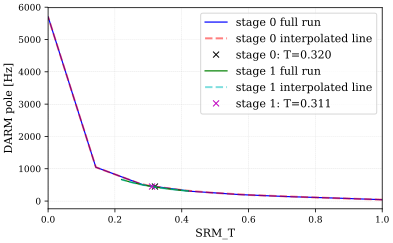

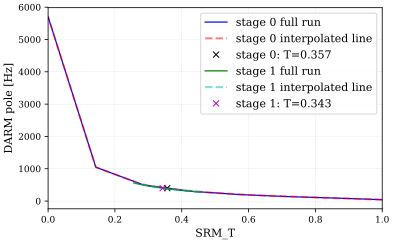

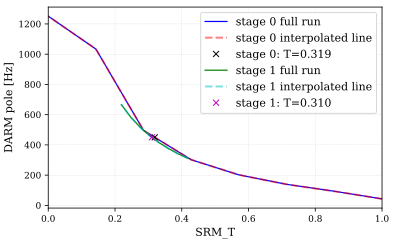

In [11]:
T_SRM, fp =df.tuneTfp_I2(aLIGO,target=450,loss = aLIGO.SRM.L,debug=True)

T_SRM, fp =df.tuneTfp_I2(aLIGO,target=400,loss = aLIGO.SRM.L,debug=True)

kk=aLIGO.deepcopy()
kk.maxtem=2
kk=aligo.setup(kk)
T_SRM, fp =df.tuneTfp_I2(kk,target=450,loss = aLIGO.SRM.L,debug=True)


## put it all together

### broader search at several maxtem

reference values: 

maxtem: 4

    Optic:       Transmission:      Loss
    ITMX         0.014             3.75e-05
    ITMY         0.014             3.75e-05
    PRM          0.03             8.5e-06
    SRM          0.325             8.7e-06
    

    Cav:      Finesse:     Pcirc:
    Xarm      443       7.14e+05
    PRX       4.1967       5366
    SRX       3.2578       4.744
        
fp2 = 425.645Hz [phase shifts by -45deg from initial value]

-------------
ITMX_T = 0.014 (=ITMY_T). running setup()
restoring Parm to target of 713505W with PRM_T... PRM_T = 0.0298. running setup()
restoring DARM pole to target of 425.645Hz using SRM_T...  SRM_T = 0.3251. running setup()
-------------
ITMX_T = 0.0131 (=ITMY_T). running setup()
restoring Parm to target of 713505W with PRM_T... PRM_T = 0.0320. running setup()
restoring DARM pole to target of 425.645Hz using SRM_T...  SRM_T = 0.3084. running setup()
-------------
ITMX_T = 0.0123 (=ITMY_T). running setup()
restoring Parm to target of 713

/Users/annagreen/miniconda3/envs/myenv/lib/python3.7/site-packages/matplotlib/figure.py:445: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  % get_backend())
/Users/annagreen/miniconda3/envs/myenv/lib/python3.7/site-packages/matplotlib/figure.py:2369: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  warnings.warn("This figure includes Axes that are not compatible "


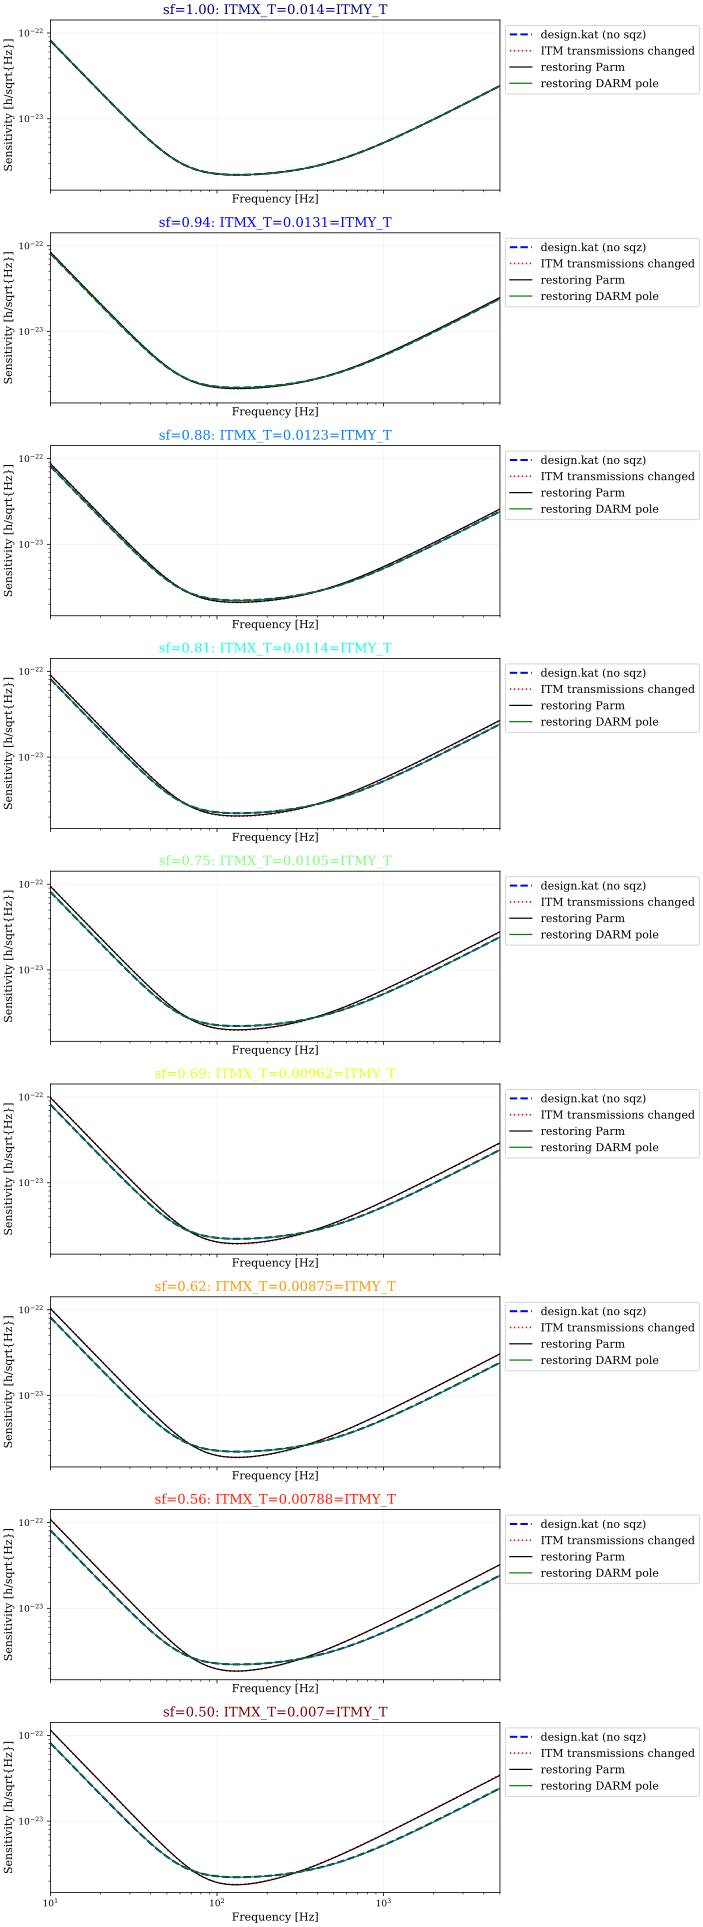

In [3]:
# maxtemkats = []

sfs = np.linspace(1,0.5,9)
cols=cm.jet(np.linspace(0,1,len(sfs)))

for mm in [4]:
    model = aLIGO.deepcopy()
    model.maxtem=mm
    model=aligo.setup(model)

    fig , ax  = plt.subplots(len(sfs),1,tight_layout=True,sharex=True,sharey=True,figsize=(10,len(sfs)*3)) #QNLS

    print("reference values: ")
    print('\nmaxtem: {}'.format(model.maxtem))
    df.printTs(model)
    df.getPF(model,printit=True)
    #reference line
    refvals=df.getPF(model)
    refPow=refvals[1]
    reffp = df.DARM_TF(model,optics=["LX","LY"],getfp ='fp2')
    print()

#     outkats=[]
    for sf,i in zip(sfs,range(len(sfs))):
        print('-------------')
        aligoplt.strain_sensitivity(model,ax=ax[i],
                            plot_cmds={'label':'design.kat (no sqz)',
                                           'ls':'--','lw':2})
        base=model.deepcopy()

        ###change ITM reflectivities
        base.ITMX.setRTL(1-model.ITMX.T*sf-model.ITMX.L,model.ITMX.T*sf,model.ITMX.L)
        base.ITMY.setRTL(1-model.ITMY.T*sf-model.ITMY.L,model.ITMY.T*sf,model.ITMY.L)
        print("ITMX_T = {:.3g} (=ITMY_T; sf={:.3f}). running setup()".format(float(base.ITMX.T),sf))
        base = aligo.setup(base) #VERY NECESSARY TO MAINTAIN RESONANCE!
        cavvals=df.getPF(base)
        aligoplt.strain_sensitivity(base,ax=ax[i],
                                    plot_cmds={'label':'ITM transmissions changed','lw':1.5,'ls':':'})

        ##tune PRM transmission to get back to original arm power
        print('restoring Parm to target of {:.0f}W with PRM_T...'.format(refvals[1]),end=' ')
#         T,P = tuneT(base,optic='PRM',node='nETMX1',val=0.03,precision=0.025,
#               target_precision=None,target=refPow,debug=False) #<---------Looping OFF for now - VV slow here
        T,P = df.quicktuneT2(base,optic='PRM',node='nETMX1',val=0.05,precision=0.045,
               target_precision=None,target=refPow,debug=False)#<looping off, not setup() in this version but difference is minor
        base1=base.deepcopy()
        base1.PRM.setRTL(1-T-base1.PRM.L, T,base1.PRM.L)
        print('PRM_T = {:.4f}. running setup()'.format(T))
        base1 = aligo.setup(base1)
        cavvals1=df.getPF(base1)
        aligoplt.strain_sensitivity(base1,ax=ax[i],
                                    plot_cmds={'label':'restoring Parm'})

        ##tune SRM transmission to get the sensitivity curve back
        print('restoring DARM pole to target of {:.3f}Hz using SRM_T...'.format(reffp),end=' ')
        T_SRM, fp = df.tuneTfp_I2(base1,target=reffp,loss = model.SRM.L)#,debug=True
        base2=base1.deepcopy()
        base2.SRM.setRTL(1-T_SRM-base2.PRM.L, T_SRM ,base2.PRM.L)
        print('SRM_T = {:.4f}. running setup()'.format(T_SRM))
        base2 = aligo.setup(base2)
        cavvals2=df.getPF(base2)
        aligoplt.strain_sensitivity(base2,ax=ax[i],
                                    plot_cmds={'label':'restoring DARM pole'})


        ax[i].set_title("sf={:.2f}: ITMX_T={:.3g}=ITMY_T".format(sf,float(base.ITMX.T)),color=cols[i])
        ax[i].legend(loc=2,bbox_to_anchor=(1,1))
        
        base2.save("temp/aLIGO_maxtem{}_ITMsf={}.kat".format(base2.maxtem,sf))

#         outkats.append(base2)
    
    fig.show()
#     maxtemkats.append(outkats)

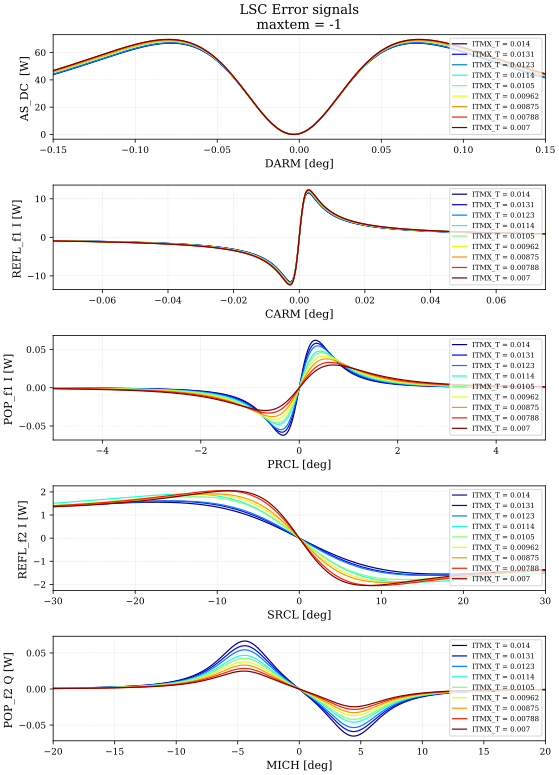

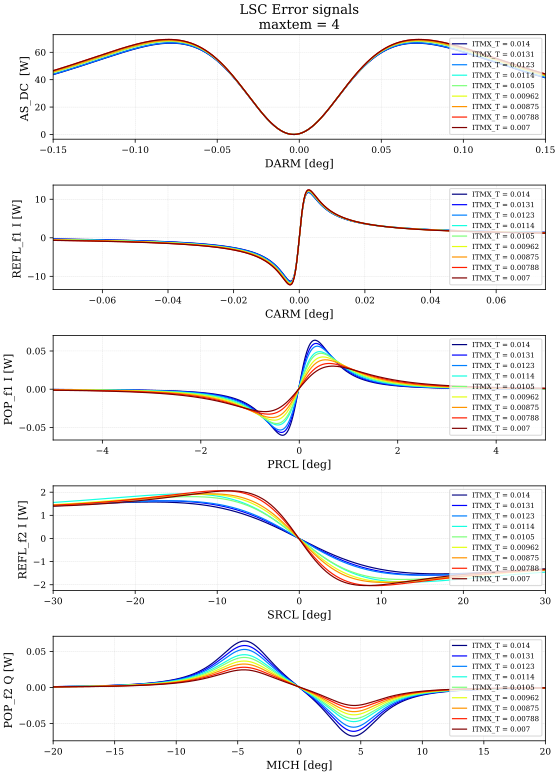

In [5]:
##CHANGE from CavFinesseChanges original: loading saved kat files instead of running with kat objects in local memory

#xaxis scaling:
#[kat.IFO.DARM, kat.IFO.CARM, kat.IFO.PRCL, kat.IFO.SRCL, kat.IFO.MICH]
xsc = [0.15,0.05,0.05,0.3,0.2]
xlims=[[-aa,aa] for aa in xsc]

steps=400
# #
sfs = np.linspace(1,0.5,9) #as in the preceeding cell
cols=cm.jet(np.linspace(0,1,len(sfs)))
maxtems=[-1,4]


for m in maxtems:
    
    fig2, ax2 = plt.subplots(5,1,figsize=(8,11),tight_layout=True)#Errsigs
    ax2[0].set_title("LSC Error signals\nmaxtem = {}".format(m))

    for sf,i in zip(sfs,range(len(sfs))):
        k = aligo.make_kat(katfile="temp/aLIGO_maxtem{}_ITMsf={}.kat".format(m,sf))
        ##plot the error signals
        label="ITMX_T = {:.3g}".format(float(k.ITMX.T))
        col=cols[i]

        kat = k.deepcopy()
        kat.removeBlock('locks')
        DOFs = [kat.IFO.DARM, kat.IFO.CARM, kat.IFO.PRCL, kat.IFO.SRCL, kat.IFO.MICH]
        for d,idx in zip(DOFs,range(len(DOFs))):
            _k=kat.deepcopy()
            _k.parse(d.signal())
            scan_cmd = aligoplt.scan_optics_string(d.optics, d.factors, "scan", linlog="lin",
                                                xlimits=np.multiply(d.scale, xlims[idx]), steps=steps, relative=True)
            _k.parse(scan_cmd)
            o=_k.run()

            DC_Offset = None  
            # Get a lock offset if used
            if (d.name + '_lock') in _k.commands:
                DC_Offset = _k.commands[d.name + '_lock'].offset
            if DC_Offset is None:
                DC_Offset = 0
            else:
                DC_Offset = float(DC_Offset)

            ax2[idx].plot(o.x, o[d.signal_name()] + DC_Offset, label=label,color=col)
            ax2[idx].set_ylabel('{} {} [W] '.format(d.port.name, d.quad))
            ax2[idx].legend(loc=1,fontsize=7)
            ax2[idx].grid(True)
            ax2[idx].set_xlim([np.min(o.x), np.max(o.x)])
            ax2[idx].set_xlabel("{} [deg]".format(d.name))
        
    fig2.savefig("temp/Errsigs_maxtem={}.pdf".format(m))
    fig2.show()

All the final sensitivity curves seem fine, and there's nothing off in the error signals when we compare m-1 to m4. 

But some of these maxtem 4 cases triggered the extrapolating interpolator when finding their darm pole. (yayy that that's not crashing things now at least!! - 2020.03.31). 

This is a bit weird... so let's look at them in more detail and compare the DARM TFs for maxtem 2 and maxtem 4 in these cases.

issue cases:
steps: [2,3] (=> ITM_T=[0.0123,0.0114] => sf=[0.875,0.8125])

NB: the cell below produces MANY plots. it's slow and takes a lot of memory. So I've made it rawNBconvert for now. for the record, the outputs for this whole notebook are in CavFinesseChanges_2_m4breakingreason(fixed!).html. 

In essence: the first point the pole getter tries is often weird, because the first SRM transmission tried is very very low, giving a weird TF to try to measure a pole frequency. We either see just noise, or get a sharp peak from the optical spring. So sometimes the pole getter is able to find a random point that meets the 45deg requirement, and sometimes it needs extrapolation enabled to get there. So we could probably avoid this bug but just adjusting the initial range to be less "every possible transmission" and more "every possible _and plausible_ transmission". 

-----------------------

### older versions:

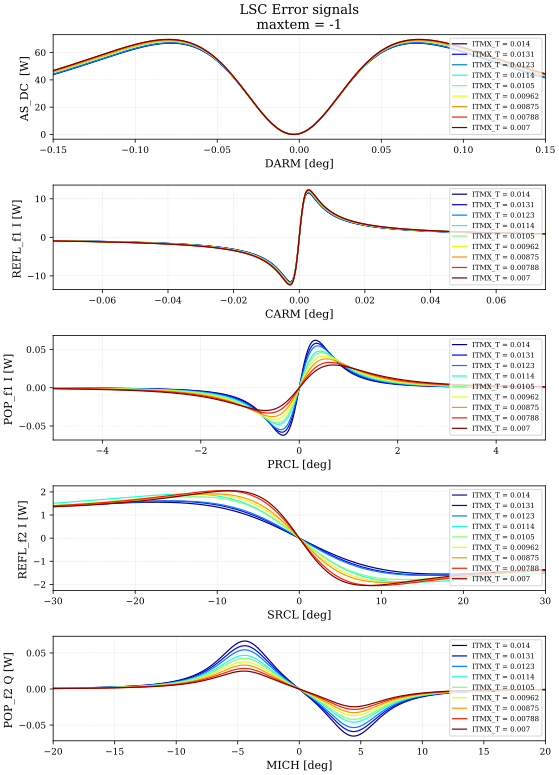

In [13]:
#xaxis scaling:
#[kat.IFO.DARM, kat.IFO.CARM, kat.IFO.PRCL, kat.IFO.SRCL, kat.IFO.MICH]
xsc = [0.15,0.05,0.05,0.3,0.2]
xlims=[[-aa,aa] for aa in xsc]

steps=400
# #
# sfs = np.linspace(1,0.5,9) #as in the preceeding cell

for outkats in maxtemkats:
    
    fig2, ax2 = plt.subplots(5,1,figsize=(8,11),tight_layout=True)#Errsigs
    ax2[0].set_title("LSC Error signals\nmaxtem = {}".format(outkats[0].maxtem))

    for k,i in zip(outkats,range(len(sfs))):
        ##plot the error signals
        label="ITMX_T = {:.3g}".format(float(k.ITMX.T))
        col=cols[i]

        kat = k.deepcopy()
        kat.removeBlock('locks')
        DOFs = [kat.IFO.DARM, kat.IFO.CARM, kat.IFO.PRCL, kat.IFO.SRCL, kat.IFO.MICH]
        for d,idx in zip(DOFs,range(len(DOFs))):
            _k=kat.deepcopy()
            _k.parse(d.signal())
            scan_cmd = aligoplt.scan_optics_string(d.optics, d.factors, "scan", linlog="lin",
                                                xlimits=np.multiply(d.scale, xlims[idx]), steps=steps, relative=True)
            _k.parse(scan_cmd)
            o=_k.run()

            DC_Offset = None  
            # Get a lock offset if used
            if (d.name + '_lock') in _k.commands:
                DC_Offset = _k.commands[d.name + '_lock'].offset
            if DC_Offset is None:
                DC_Offset = 0
            else:
                DC_Offset = float(DC_Offset)

            ax2[idx].plot(o.x, o[d.signal_name()] + DC_Offset, label=label,color=col)
            ax2[idx].set_ylabel('{} {} [W] '.format(d.port.name, d.quad))
            ax2[idx].legend(loc=1,fontsize=7)
            ax2[idx].grid(True)
            ax2[idx].set_xlim([np.min(o.x), np.max(o.x)])
            ax2[idx].set_xlabel("{} [deg]".format(d.name))
        
    fig2.savefig("temp/Errsigs_maxtem={}.pdf".format(outkats[0].maxtem))
    fig2.show()